In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
pv_us = pd.read_csv('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/Google_Big_Query_Project/WX-PC/mweb_pv_us_bymetro2018.csv')

In [5]:
pv_us.head()

,date,metro,pageviews
0,20180101,Roanoke-Lynchburg VA,66062
1,20180101,Davenport IA-Rock Island-Moline IL,42885
2,20180101,Paducah KY-Cape Girardeau MO-Harrisburg-Mount ...,30825
3,20180101,Terre Haute IN,11963
4,20180101,Tampa-St. Petersburg (Sarasota) FL,395547


In [6]:
wx_us = pd.read_csv('//ictfilesrv/wta/Accu_Internal_D3_Projects/Pavani/Google_Big_Query_Project/WX-PC/mweb_wx_us_bymetro2018.csv')

In [7]:
wx_us.head()

,date,metro,cur_temp_avg,cur_humidity_avg,cur_wind_avg
0,2018-07-26,Cedar Rapids-Waterloo-Iowa City & Dubuque IA,70.975,72.655,9.070
1,2018-11-18,Denver CO,34.232,68.920,4.834
2,2018-07-11,Idaho Falls-Pocatello ID,77.425,38.650,9.050
3,2018-06-06,Detroit MI,62.920,62.483,5.646
4,2018-08-08,Portland-Auburn ME,78.583,80.242,4.385


In [8]:
# REGRESSION
# DIFFERENT ALGORITHMS
# RMSE ~ EVALUATION METRIC 
# WHICH WEATHE RVARAIBLE IMPACT THE PAGE VIEW MOST
# FREEDOM OF CHOOSING ALG
# METRO AND DATE JOIN ON METRO AND DATE

In [9]:
print(pv_us.info())
print(wx_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76969 entries, 0 to 76968
Data columns (total 3 columns):
date         76969 non-null int64
metro        76969 non-null object
pageviews    76969 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76965 entries, 0 to 76964
Data columns (total 5 columns):
date                76965 non-null object
metro               76965 non-null object
cur_temp_avg        76961 non-null float64
cur_humidity_avg    76965 non-null float64
cur_wind_avg        76965 non-null float64
dtypes: float64(3), object(2)
memory usage: 2.9+ MB
None


In [10]:
pv_us['date'] = pv_us['date'].astype(object)
pv_us['date'] = pd.to_datetime(pv_us['date'],format='%Y%m%d')
wx_us['date'] = pd.to_datetime(wx_us['date'])


In [11]:
wx_us.head()

,date,metro,cur_temp_avg,cur_humidity_avg,cur_wind_avg
0,2018-07-26,Cedar Rapids-Waterloo-Iowa City & Dubuque IA,70.975,72.655,9.070
1,2018-11-18,Denver CO,34.232,68.920,4.834
2,2018-07-11,Idaho Falls-Pocatello ID,77.425,38.650,9.050
3,2018-06-06,Detroit MI,62.920,62.483,5.646
4,2018-08-08,Portland-Auburn ME,78.583,80.242,4.385


In [12]:
pv_us.head()

,date,metro,pageviews
0,2018-01-01,Roanoke-Lynchburg VA,66062
1,2018-01-01,Davenport IA-Rock Island-Moline IL,42885
2,2018-01-01,Paducah KY-Cape Girardeau MO-Harrisburg-Mount ...,30825
3,2018-01-01,Terre Haute IN,11963
4,2018-01-01,Tampa-St. Petersburg (Sarasota) FL,395547


In [13]:
print(pv_us.info())
print(wx_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76969 entries, 0 to 76968
Data columns (total 3 columns):
date         76969 non-null datetime64[ns]
metro        76969 non-null object
pageviews    76969 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76965 entries, 0 to 76964
Data columns (total 5 columns):
date                76965 non-null datetime64[ns]
metro               76965 non-null object
cur_temp_avg        76961 non-null float64
cur_humidity_avg    76965 non-null float64
cur_wind_avg        76965 non-null float64
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.9+ MB
None


In [14]:
# wx_us['date']=pd.to_datetime(wx_us['date'])
# pv_us['date']=pd.to_datetime(pv_us['date'])
# print(wx_us.head())
# print(pv_us.head())

In [15]:
pv_wx =pd.merge(pv_us,wx_us, on=['date', 'metro'])

In [16]:
pv_wx.isnull().sum()

date                0
metro               0
pageviews           0
cur_temp_avg        0
cur_humidity_avg    0
cur_wind_avg        0
dtype: int64

In [17]:
pv_wx['date'].unique()

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000',
       '2018-01-13T00:00:00.000000000', '2018-01-14T00:00:00.000000000',
       '2018-01-15T00:00:00.000000000', '2018-01-16T00:00:00.000000000',
       '2018-01-17T00:00:00.000000000', '2018-01-18T00:00:00.000000000',
       '2018-01-19T00:00:00.000000000', '2018-01-20T00:00:00.000000000',
       '2018-01-21T00:00:00.000000000', '2018-01-22T00:00:00.000000000',
       '2018-01-23T00:00:00.000000000', '2018-01-24T00:00:00.000000000',
       '2018-01-25T00:00:00.000000000', '2018-01-26T00:00:00.000000000',
       '2018-01-27T00:00:00.000000000', '2018-01-28

Checking distribution of pageviews

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


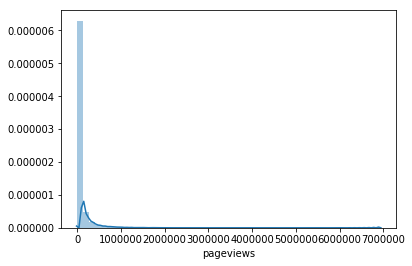

In [18]:
sns.distplot(pv_wx['pageviews'])

In [19]:
from datetime import date
import holidays
us_holidays = holidays.US(years = [2018])

In [20]:
us_holidays

{datetime.date(2018, 1, 1): "New Year's Day",
 datetime.date(2018, 1, 15): 'Martin Luther King, Jr. Day',
 datetime.date(2018, 2, 19): "Washington's Birthday",
 datetime.date(2018, 5, 28): 'Memorial Day',
 datetime.date(2018, 7, 4): 'Independence Day',
 datetime.date(2018, 9, 3): 'Labor Day',
 datetime.date(2018, 10, 8): 'Columbus Day',
 datetime.date(2018, 11, 11): 'Veterans Day',
 datetime.date(2018, 11, 12): 'Veterans Day (Observed)',
 datetime.date(2018, 11, 22): 'Thanksgiving',
 datetime.date(2018, 12, 25): 'Christmas Day'}

In [21]:
date1 = '2018-01-01'
date2 = '2018-01-15'
date3 = '2018-02-19'
date4 = '2018-05-28'
date5 = '2018-07-04' 
date6 = '2018-09-03'
date7 = '2018-10-08'
date8 = '2018-11-11'
date9 = '2018-11-12'
date10 = '2018-11-22'
date11 = '2018-12-25'
holidaydates = [date1,date2,date3,date4,date5,date6,date7,date8,date9,date10,date11]

In [22]:
holidaydates = pd.to_datetime(holidaydates)
holidaydates

DatetimeIndex(['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-11',
               '2018-11-12', '2018-11-22', '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

In [23]:
pv_wx['holiday_flag']=pv_wx['date'].apply(lambda x: "True" if x in holidaydates else "False")

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

pv_wx['month'] = pd.DatetimeIndex(pv_wx['date']).month
pv_wx['month_year'] = pd.to_datetime(pv_wx['date']).dt.to_period('M')
pv_wx['year'] = pd.DatetimeIndex(pv_wx['date']).year
pv_wx['year'].unique()

array([2018], dtype=int64)

In [25]:
pv_wx['holiday_flag_label']=label_encoder.fit_transform(pv_wx['holiday_flag'])
pv_wx['metro_label'] = label_encoder.fit_transform(pv_wx['metro'])

In [26]:
pv_wx.groupby(['metro']).size().reset_index(name='Count')

,metro,Count
0,Abilene-Sweetwater TX,365
1,Albany GA,365
2,Albany-Schenectady-Troy NY,365
3,Albuquerque-Santa Fe NM,365
4,Alexandria LA,365
5,Alpena MI,365
6,Amarillo TX,365
7,Anchorage AK,365
8,Atlanta GA,365
9,Augusta GA,365


In [27]:
pv_wx.groupby(['metro_label']).size().reset_index(name='Count')

,metro_label,Count
0,0,365
1,1,365
2,2,365
3,3,365
4,4,365
5,5,365
6,6,365
7,7,365
8,8,365
9,9,365


# Heat Map signifies correlation among variables

,pageviews,cur_temp_avg,cur_humidity_avg,cur_wind_avg,month,year,holiday_flag_label,metro_label
pageviews,1.000000,0.011606,0.049950,0.050649,-0.070342,NaN,0.006290,-0.021501
cur_temp_avg,0.011606,1.000000,-0.117649,-0.188118,0.191321,NaN,-0.059819,0.014442
cur_humidity_avg,0.049950,-0.117649,1.000000,-0.146660,0.205298,NaN,0.023048,-0.000761
cur_wind_avg,0.050649,-0.188118,-0.146660,1.000000,-0.222680,NaN,-0.011503,0.024950
month,-0.070342,0.191321,0.205298,-0.222680,1.000000,NaN,0.038413,0.000556
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday_flag_label,0.006290,-0.059819,0.023048,-0.011503,0.038413,NaN,1.000000,-0.000076
metro_label,-0.021501,0.014442,-0.000761,0.024950,0.000556,NaN,-0.000076,1.000000


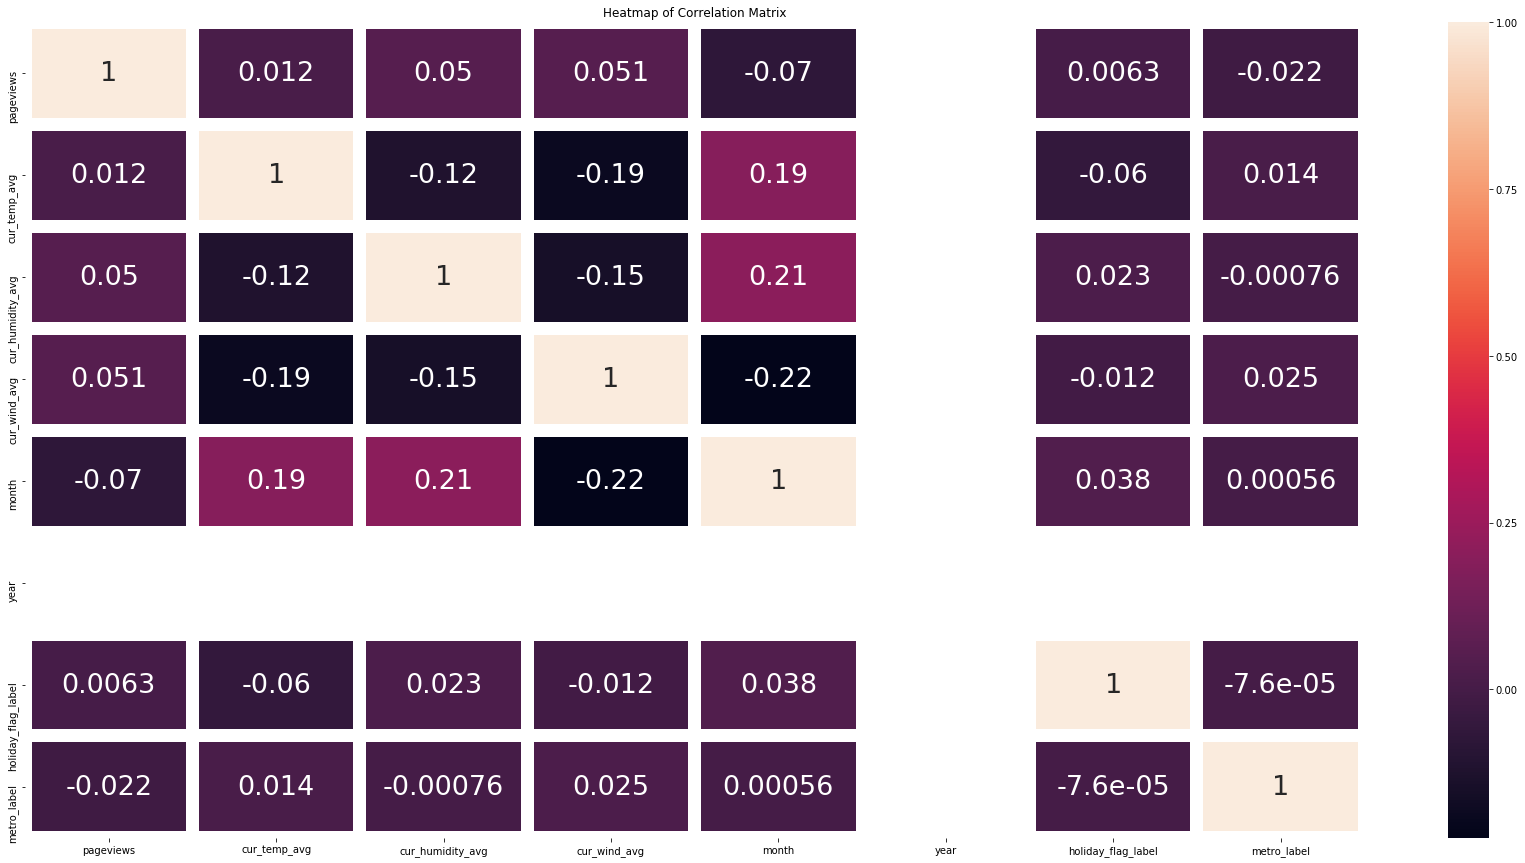

In [28]:
corr = pv_wx.corr()
fig, ax = plt.subplots(figsize=(30,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=12, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 27})
plt.title('Heatmap of Correlation Matrix')
corr

In [29]:
print('unique values of holiday flags is',pv_wx['holiday_flag'].unique())
print('unique values of metro ',pv_wx['metro'].nunique())
print(pv_wx.info())

unique values of holiday flags is ['True' 'False']
unique values of metro  210
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76604 entries, 0 to 76603
Data columns (total 12 columns):
date                  76604 non-null datetime64[ns]
metro                 76604 non-null object
pageviews             76604 non-null int64
cur_temp_avg          76604 non-null float64
cur_humidity_avg      76604 non-null float64
cur_wind_avg          76604 non-null float64
holiday_flag          76604 non-null object
month                 76604 non-null int64
month_year            76604 non-null object
year                  76604 non-null int64
holiday_flag_label    76604 non-null int32
metro_label           76604 non-null int32
dtypes: datetime64[ns](1), float64(3), int32(2), int64(3), object(3)
memory usage: 7.0+ MB
None


# Logistic Regression (Basic)

training shape (61283, 3)


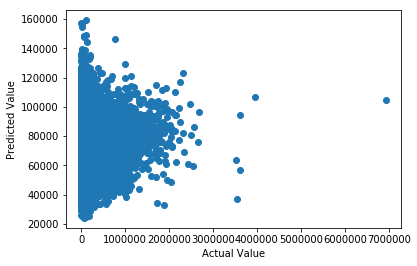

r2 score is 0.006929152957859563
cofficients are [[ 277.36986188  825.19336634 3964.2016919 ]]
mean squared error is 29848311292.769756
Training data accuracy using 5-Fold Cross Validation is : 0.006771653466365546


C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


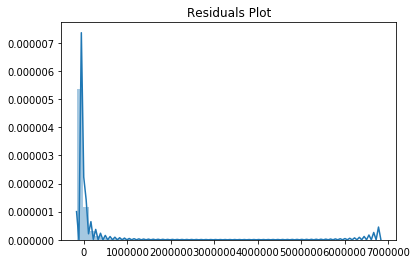

In [30]:
X = pv_wx[['cur_temp_avg','cur_humidity_avg','cur_wind_avg']]
y = pv_wx[['pageviews']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

print('training shape',X_train.shape)
y_hat = reg.predict(X_train)

plt.scatter(y_train,y_hat)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

print('r2 score is',reg.score(X_train,y_train))

print('cofficients are',reg.coef_)
  
from sklearn.metrics import mean_squared_error
print('mean squared error is',mean_squared_error(y_train, y_hat))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_score = cross_val_score(reg, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))

sns.distplot(y_train - y_hat)
plt.title("Residuals Plot")
plt.show()

# Logistic (added more varaibles)

training shape (61283, 5)


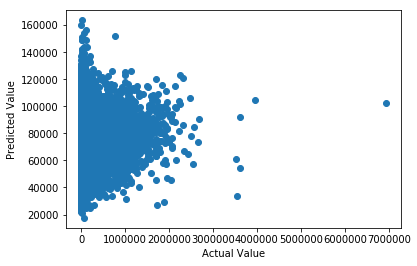

r2 score is 0.007568222841994432
cofficients are [[ 286.44096227  825.90903497 4016.63772264  -68.4577566  8198.28661167]]
mean squared error is 29829103039.001854
Training data accuracy using 5-Fold Cross Validation is : 0.007338633977906128


C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


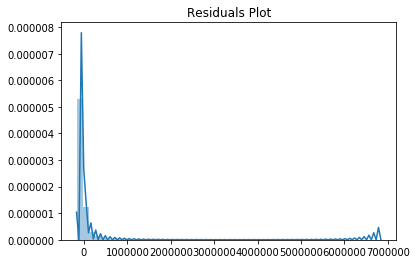

In [31]:
X = pv_wx[['cur_temp_avg','cur_humidity_avg','cur_wind_avg','metro_label','holiday_flag_label']]
y = pv_wx[['pageviews']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

print('training shape',X_train.shape)
y_hat = reg.predict(X_train)

plt.scatter(y_train,y_hat)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

print('r2 score is',reg.score(X_train,y_train))

print('cofficients are',reg.coef_)
  
from sklearn.metrics import mean_squared_error
print('mean squared error is',mean_squared_error(y_train, y_hat))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_score = cross_val_score(reg, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))

sns.distplot(y_train - y_hat)
plt.title("Residuals Plot")
plt.show()

In [32]:
pv_wx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76604 entries, 0 to 76603
Data columns (total 12 columns):
date                  76604 non-null datetime64[ns]
metro                 76604 non-null object
pageviews             76604 non-null int64
cur_temp_avg          76604 non-null float64
cur_humidity_avg      76604 non-null float64
cur_wind_avg          76604 non-null float64
holiday_flag          76604 non-null object
month                 76604 non-null int64
month_year            76604 non-null object
year                  76604 non-null int64
holiday_flag_label    76604 non-null int32
metro_label           76604 non-null int32
dtypes: datetime64[ns](1), float64(3), int32(2), int64(3), object(3)
memory usage: 7.0+ MB


# Descision Tree Forests (MULTIPLE VARIABLES ADDED)

In [33]:
X = pv_wx[['cur_temp_avg','cur_humidity_avg','cur_wind_avg','metro_label','holiday_flag_label','month','year']]
y = pv_wx[['pageviews']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)
y_1 = regr_2.predict(X_train)
# sns.distplot((y_train['pageviews'] - y_1)
# plt.title("Residuals Plot")
# plt.show()
mean_squared_error(y_train, y_1)
cv_score = cross_val_score(regr_2, X_train, y_train, cv=5)
print("Training data accuracy using 5-Fold Cross Validation is :", (np.mean(cv_score)))
print('model score',regr_2.score(X_train,y_train))
print('r2score',r2_score(y_train, y_1))

# test data scores
regr_test = DecisionTreeRegressor(max_depth=5)
regr_test.fit(X_train, y_train)
y_test_pred = regr_test.predict(X_test)
# sns.distplot(y_test['pageviews'] - y_test_pred)
# plt.title("Residuals Plot")
# plt.show()
print('MSE test ',mean_squared_error(y_test, y_test_pred))
print('RMSE test ',np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('r2 test score',r2_score(y_test, y_test_pred))

Training data accuracy using 5-Fold Cross Validation is : 0.41869936760021476
model score 0.4292874297690754
r2score 0.4292874297690754
MSE test  15984979417.518616
RMSE test  126431.71839976951
r2 test score 0.36700161059762315


# Random Forest Regression (Feature Importance)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [36]:
regr = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=1000)
regr.fit(X,y)
print(regr.feature_importances_)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.00434651 0.0032774  0.02523008 0.94925676 0.         0.01788925
 0.        ]


1. Include Day of Week and Day of Month 
2. Include Season
3. Try XGBoost (for Strong and Weak Learners)

# Season

In [37]:
conditions =[
    (pv_wx['month']==1 )| (pv_wx['month']==12)| (pv_wx['month']==2),
    (pv_wx['month']==3) | (pv_wx['month']==4) | ( pv_wx['month']==5),
    (pv_wx['month']==6) | (pv_wx['month']==7) | (pv_wx['month']==8),
    (pv_wx['month']==9)|(pv_wx['month']==10)| (pv_wx['month']==11),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
pv_wx['Season']= np.select(conditions, choices, default="black")



In [38]:
pv_wx['Season_label'] = label_encoder.fit_transform(pv_wx['Season'])

# Day of Week and Month

In [39]:
pv_wx['day_of_week'] = pv_wx['date'].dt.weekday
pv_wx['day_of_month'] = pv_wx['date'].dt.day

# XG Boost(New Varibles Added)

In [40]:
X = pv_wx[['cur_temp_avg','cur_humidity_avg','cur_wind_avg','metro_label','holiday_flag_label','Season_label','month','year','day_of_week','day_of_month']]
y = pv_wx[['pageviews']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

[22:23:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train data RMSE: 180155.152952
r2 score for train data -0.07982616062298686


C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


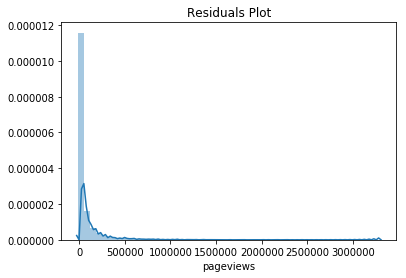

test data RMSE: 165845.922989
r2 score for test data -0.0891811659515016


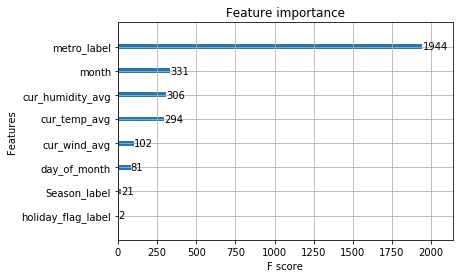

In [41]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.001,
                max_depth = 5, alpha = 5 , n_estimators = 100)

## reg:linear is for regression problems

xg_reg.fit(X_train,y_train)

y_train_pred = xg_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("train data RMSE: %f" % (rmse_train))
print("r2 score for train data",r2_score(y_train,y_train_pred))

y_test_pred = xg_reg.predict(X_test)
sns.distplot(y_test['pageviews'] - y_test_pred)
plt.title("Residuals Plot")
plt.show()
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("test data RMSE: %f" % (rmse))
print("r2 score for test data",r2_score(y_test,y_test_pred))

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# Random Forests Regressor

In [42]:
X = pv_wx[['cur_temp_avg','cur_humidity_avg','cur_wind_avg','metro_label','holiday_flag_label','Season_label','month','year','day_of_week','day_of_month']]
y = pv_wx[['pageviews']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30,random_state=42)

In [43]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [44]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17450.096031676963
Mean Squared Error: 3810416976.730439
Root Mean Squared Error: 61728.57504211837


RMSE is relatively lesser compared to other model's RMSEs

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


train data RMSE: 25263.589017
r2 score for train data 0.9787096818917372


C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


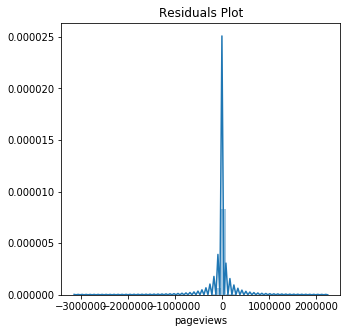

test data RMSE: 61728.575042
r2 score for test data 0.8590919984816866


In [45]:

regressor.fit(X_train,y_train)

y_train_pred = regressor.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("train data RMSE: %f" % (rmse_train))
print("r2 score for train data",r2_score(y_train,y_train_pred))

y_test_pred = regressor.predict(X_test)
sns.distplot(y_test['pageviews'] - y_test_pred)
plt.title("Residuals Plot")
plt.show()
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("test data RMSE: %f" % (rmse))
print("r2 score for test data",r2_score(y_test,y_test_pred))


In [46]:
rmse/(max(pv_wx['pageviews']))

0.008908033584064508

In [47]:
y_test_pred = regressor.predict(X_test)

pred_df=pd.DataFrame({'Actual':y_test['pageviews'],'Predicted':y_test_pred,'diff%':round((y_test_pred-y_test['pageviews'])/y_test['pageviews']*100,4)})
pred_df.head()

,Actual,Predicted,diff%
63693,17776,19180.75,7.9025
19234,3841,6253.10,62.7988
46490,4181,3663.60,-12.3750
27333,840227,617077.25,-26.5583
21287,608893,296868.00,-51.2446


In [48]:
pv_wx.head()

,date,metro,pageviews,cur_temp_avg,cur_humidity_avg,cur_wind_avg,holiday_flag,month,month_year,year,holiday_flag_label,metro_label,Season,Season_label,day_of_week,day_of_month
0,2018-01-01,Roanoke-Lynchburg VA,66062,17.608,50.643,7.970,True,1,2018-01,2018,1,158,Winter,3,0,1
1,2018-01-01,Davenport IA-Rock Island-Moline IL,42885,26.475,68.050,9.128,True,1,2018-01,2018,1,50,Winter,3,0,1
2,2018-01-01,Paducah KY-Cape Girardeau MO-Harrisburg-Mount ...,30825,12.094,55.326,8.253,True,1,2018-01,2018,1,141,Winter,3,0,1
3,2018-01-01,Terre Haute IN,11963,14.197,62.036,8.101,True,1,2018-01,2018,1,185,Winter,3,0,1
4,2018-01-01,Tampa-St. Petersburg (Sarasota) FL,395547,45.930,82.001,11.703,True,1,2018-01,2018,1,184,Winter,3,0,1


# Labelling Weather Variables to check if the Model performs even better

In [49]:
conditions=[(pv_wx['cur_temp_avg']<40),
            (pv_wx['cur_temp_avg']<50) & (pv_wx['cur_temp_avg']>=40),
            (pv_wx['cur_temp_avg']<60) & (pv_wx['cur_temp_avg']>=50),
           (pv_wx['cur_temp_avg']<65) & (pv_wx['cur_temp_avg']>=60),
           (pv_wx['cur_temp_avg']<70) & (pv_wx['cur_temp_avg']>=65),
           (pv_wx['cur_temp_avg']<80) & (pv_wx['cur_temp_avg']>=70),
           (pv_wx['cur_temp_avg']<90) & (pv_wx['cur_temp_avg']>=80),
           (pv_wx['cur_temp_avg']>=90)]
# try not to use > and < signs as XGBoost algorithm complains about them
choices=['LT40','40_50','50_60','60_65','65_70','70_80','80_90','GT90']
pv_wx['temp_cat']=np.select(conditions, choices)


cond_hum=[(pv_wx['cur_humidity_avg']<60),
            (pv_wx['cur_humidity_avg']<70) & (pv_wx['cur_humidity_avg']>=60),
            (pv_wx['cur_humidity_avg']<75) & (pv_wx['cur_humidity_avg']>=70),
           (pv_wx['cur_humidity_avg']<80) & (pv_wx['cur_humidity_avg']>=75),
           (pv_wx['cur_humidity_avg']>=80)]
cho_hum=['LT60','60_70','70_75','75_80','GT80']
pv_wx['hum_cat']=np.select(cond_hum,cho_hum)


cond_wind=[(pv_wx['cur_wind_avg']<5),
            (pv_wx['cur_wind_avg']<7.5) & (pv_wx['cur_wind_avg']>=5),
            (pv_wx['cur_wind_avg']>=7.5)]
cho_wind=['LT5','5_7.5','GT7.5']
pv_wx['wind_cat']=np.select(cond_wind,cho_wind)

In [50]:
pv_wx.head(5)

,date,metro,pageviews,cur_temp_avg,cur_humidity_avg,cur_wind_avg,holiday_flag,month,month_year,year,holiday_flag_label,metro_label,Season,Season_label,day_of_week,day_of_month,temp_cat,hum_cat,wind_cat
0,2018-01-01,Roanoke-Lynchburg VA,66062,17.608,50.643,7.970,True,1,2018-01,2018,1,158,Winter,3,0,1,LT40,LT60,GT7.5
1,2018-01-01,Davenport IA-Rock Island-Moline IL,42885,26.475,68.050,9.128,True,1,2018-01,2018,1,50,Winter,3,0,1,LT40,60_70,GT7.5
2,2018-01-01,Paducah KY-Cape Girardeau MO-Harrisburg-Mount ...,30825,12.094,55.326,8.253,True,1,2018-01,2018,1,141,Winter,3,0,1,LT40,LT60,GT7.5
3,2018-01-01,Terre Haute IN,11963,14.197,62.036,8.101,True,1,2018-01,2018,1,185,Winter,3,0,1,LT40,60_70,GT7.5
4,2018-01-01,Tampa-St. Petersburg (Sarasota) FL,395547,45.930,82.001,11.703,True,1,2018-01,2018,1,184,Winter,3,0,1,40_50,GT80,GT7.5


In [51]:
pv_wx['temp_label'] = label_encoder.fit_transform(pv_wx['temp_cat'])
pv_wx['hum_label'] = label_encoder.fit_transform(pv_wx['hum_cat'])
pv_wx['wind_label'] = label_encoder.fit_transform(pv_wx['wind_cat'])

In [52]:
X = pv_wx[['cur_temp_avg','cur_humidity_avg','cur_wind_avg','metro_label','holiday_flag_label','Season_label','month','year','day_of_week','day_of_month','temp_label','hum_label','wind_label']]
y = pv_wx[['pageviews']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20,random_state=42)

In [53]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


train data RMSE: 23809.622148
r2 score for train data 0.9811389670387776


C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


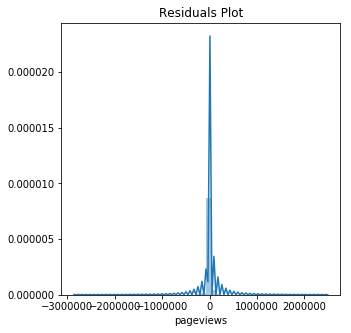

test data RMSE: 60736.060313
r2 score for test data 0.8539223549265482


In [54]:
regressor.fit(X_train,y_train)

y_train_pred = regressor.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
print("train data RMSE: %f" % (rmse_train))
print("r2 score for train data",r2_score(y_train,y_train_pred))

y_test_pred = regressor.predict(X_test)
sns.distplot(y_test['pageviews'] - y_test_pred)
plt.title("Residuals Plot")
plt.show()
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("test data RMSE: %f" % (rmse))
print("r2 score for test data",r2_score(y_test,y_test_pred))


In [55]:
y_test_pred = regressor.predict(X_test)

pred_df=pd.DataFrame({'Actual':y_test['pageviews'],'Predicted':y_test_pred,'diff%':round((y_test_pred-y_test['pageviews'])/y_test['pageviews']*100,4)})
pred_df.head()

,Actual,Predicted,diff%
63693,17776,18000.15,1.2610
19234,3841,6408.25,66.8381
46490,4181,4524.15,8.2074
27333,840227,557718.40,-33.6229
21287,608893,382301.30,-37.2137


In [56]:
rmse/(max(pv_wx['pageviews']))

0.008764804058130739

Adding Labels on Weather Variables ahs increased the % by 1 percent
RMSE Value decreased too by 1000 points